In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/accelerometer-casestudy-dataset/accdata.csv


In [2]:
acc=pd.read_csv("/kaggle/input/accelerometer-casestudy-dataset/accdata.csv")
acc

,Date,Time,accel_x,accel_y,accel_z
0,2022-09-03,23:35:16,-1.838747,3.543418,9.126697
1,2022-09-03,23:35:31,1.110910,1.810017,9.634268
2,2022-09-03,23:35:47,8.829816,0.833182,4.663905
3,2022-09-03,23:36:52,-0.852336,-0.124498,9.787497
4,2022-09-03,23:37:44,-0.900220,-0.095768,9.835381
...,...,...,...,...,...
27932,2022-09-17,23:35:31,-3.706224,7.556100,-4.845864
27933,2022-09-17,23:36:12,-0.296881,0.430956,9.749189
27934,2022-09-17,23:36:27,-0.785298,0.603339,9.931149
27935,2022-09-17,23:36:42,0.229843,0.986411,9.854534


In [3]:
acc.head(5)

,Date,Time,accel_x,accel_y,accel_z
0,2022-09-03,23:35:16,-1.838747,3.543418,9.126697
1,2022-09-03,23:35:31,1.110910,1.810017,9.634268
2,2022-09-03,23:35:47,8.829816,0.833182,4.663905
3,2022-09-03,23:36:52,-0.852336,-0.124498,9.787497
4,2022-09-03,23:37:44,-0.900220,-0.095768,9.835381


<function matplotlib.pyplot.show(close=None, block=None)>

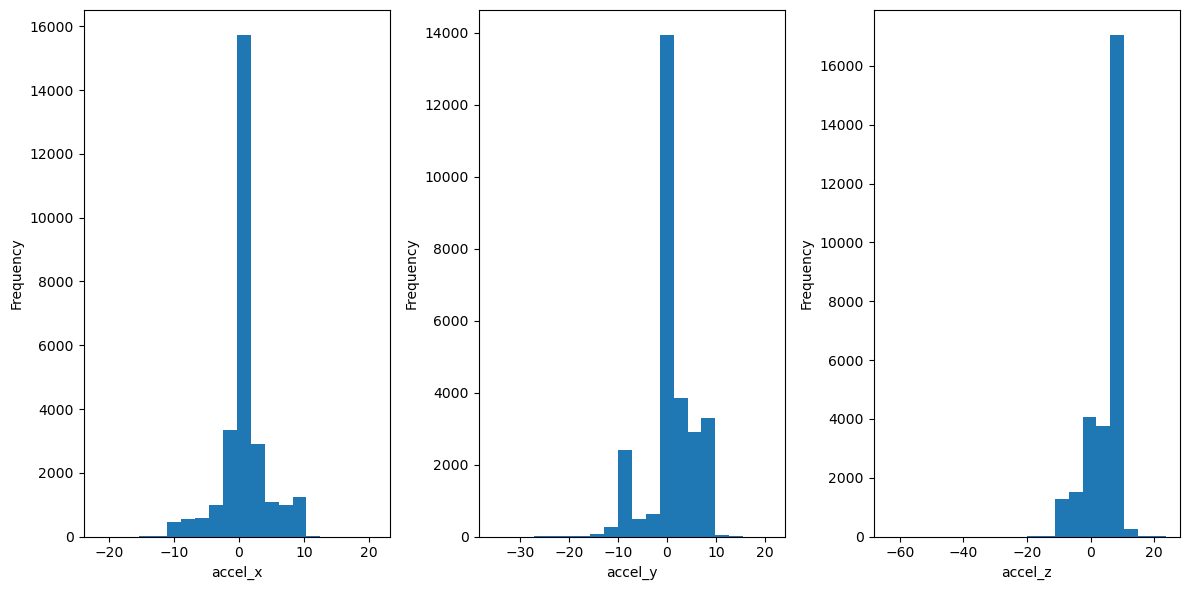

In [4]:
# Plot histograms of the accelerometer readings on each axis
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(acc['accel_x'], bins=20)
plt.xlabel('accel_x')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(acc['accel_y'], bins=20)
plt.xlabel('accel_y')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(acc['accel_z'], bins=20)
plt.xlabel('accel_z')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show

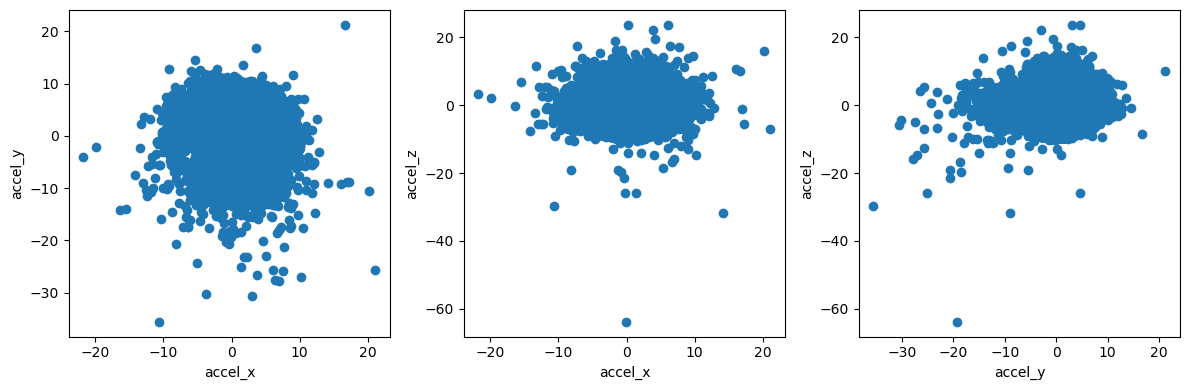

In [5]:
# Plot scatter plots of accelerometer readings on each axis
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(acc['accel_x'], acc['accel_y'])
plt.xlabel('accel_x')
plt.ylabel('accel_y')

plt.subplot(1, 3, 2)
plt.scatter(acc['accel_x'], acc['accel_z'])
plt.xlabel('accel_x')
plt.ylabel('accel_z')

plt.subplot(1, 3, 3)
plt.scatter(acc['accel_y'], acc['accel_z'])
plt.xlabel('accel_y')
plt.ylabel('accel_z')

plt.tight_layout()
plt.show()

Time-Series Analysis:

In [6]:
# Convert the 'Date' and 'Time' columns to datetime format
acc['Timestamp'] = pd.to_datetime(acc['Date'] + ' ' + acc['Time'])
acc['Timestamp']

0       2022-09-03 23:35:16
1       2022-09-03 23:35:31
2       2022-09-03 23:35:47
3       2022-09-03 23:36:52
4       2022-09-03 23:37:44
                ...        
27932   2022-09-17 23:35:31
27933   2022-09-17 23:36:12
27934   2022-09-17 23:36:27
27935   2022-09-17 23:36:42
27936   2022-09-17 23:36:57
Name: Timestamp, Length: 27937, dtype: datetime64[ns]

In [7]:
# Set the 'Timestamp' column as the index
acc.set_index('Timestamp', inplace=True)

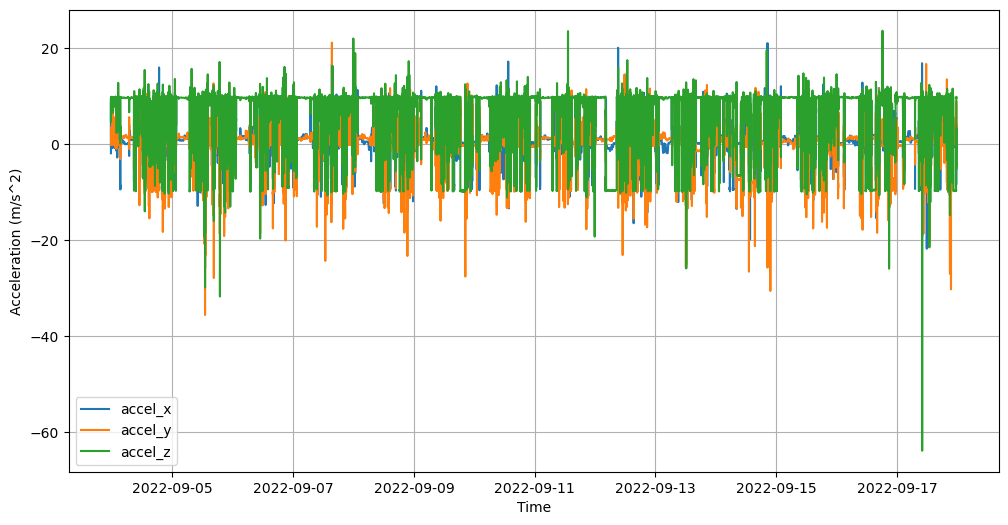

In [8]:
# Plot the acceleration values over time
plt.figure(figsize=(12, 6))
plt.plot(acc.index, acc['accel_x'], label='accel_x')
plt.plot(acc.index, acc['accel_y'], label='accel_y')
plt.plot(acc.index, acc['accel_z'], label='accel_z')
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Prepare the features (acceleration values) and target (activity labels)
X = acc[['accel_x', 'accel_y', 'accel_z']]
y = acc['Time']

In [11]:
print(acc.columns)

Index(['Date', 'Time', 'accel_x', 'accel_y', 'accel_z'], dtype='object')


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train, X_test, y_train, y_test

(                      accel_x   accel_y   accel_z
 Timestamp                                        
 2022-09-04 10:19:08  0.459687 -0.181959  9.854534
 2022-09-17 12:57:03  0.162806 -0.268151  9.873688
 2022-09-17 15:59:57 -0.143652  8.580819 -4.309563
 2022-09-08 17:50:48  1.417367 -1.561020  9.634268
 2022-09-08 23:52:58  1.580173  9.040505  3.629610
 ...                       ...       ...       ...
 2022-09-14 16:14:22  1.359907  0.861913  9.749189
 2022-09-06 10:40:16  0.488417 -0.076614  9.902418
 2022-09-04 14:06:18  7.776367 -0.076614  6.205771
 2022-09-11 14:44:13  7.115568  3.562572 -5.832275
 2022-09-15 20:46:06 -0.411803  0.153229  9.768343
 
 [22349 rows x 3 columns],
                       accel_x   accel_y   accel_z
 Timestamp                                        
 2022-09-10 20:54:34 -0.143652  3.543418  9.270349
 2022-09-08 12:12:33  0.373495 -0.114922  9.902418
 2022-09-04 22:03:23  0.306458 -0.038307  9.940725
 2022-09-16 03:09:23 -9.011775 -2.317587  1.924938
 2

In [14]:
# Initialize a decision tree classifier
classifier = DecisionTreeClassifier()
classifier

DecisionTreeClassifier()

In [15]:
# Train the classifier on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Predict the activities for the test data
y_pred = classifier.predict(X_test)

In [17]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


Feature Engineering:

In [18]:
# Calculate the magnitude of acceleration
acc['accel_magnitude'] = np.sqrt(acc['accel_x']**2 + acc['accel_y']**2 + acc['accel_z']**2)


In [19]:
acc['accel_magnitude']

Timestamp
2022-09-03 23:35:16     9.961596
2022-09-03 23:35:31     9.865566
2022-09-03 23:35:47    10.020571
2022-09-03 23:36:52     9.825328
2022-09-03 23:37:44     9.876957
                         ...    
2022-09-17 23:35:31     9.711496
2022-09-17 23:36:12     9.763225
2022-09-17 23:36:27     9.980402
2022-09-17 23:36:42     9.906446
2022-09-17 23:36:57     9.839991
Name: accel_magnitude, Length: 27937, dtype: float64

In [20]:
# Compute statistics for specific time intervals
# For example, compute mean, standard deviation, and peak values for every hour
interval = '1H'  # Change this to the desired time interval

In [21]:
# Convert the 'Time' column to a timestamp
acc['Timestamp'] = pd.to_datetime(acc['Time'])
acc['Timestamp']

Timestamp
2022-09-03 23:35:16   2023-06-12 23:35:16
2022-09-03 23:35:31   2023-06-12 23:35:31
2022-09-03 23:35:47   2023-06-12 23:35:47
2022-09-03 23:36:52   2023-06-12 23:36:52
2022-09-03 23:37:44   2023-06-12 23:37:44
                              ...        
2022-09-17 23:35:31   2023-06-12 23:35:31
2022-09-17 23:36:12   2023-06-12 23:36:12
2022-09-17 23:36:27   2023-06-12 23:36:27
2022-09-17 23:36:42   2023-06-12 23:36:42
2022-09-17 23:36:57   2023-06-12 23:36:57
Name: Timestamp, Length: 27937, dtype: datetime64[ns]

In [22]:
# Group the data by the specified time interval and calculate the statistics
acc_interval = acc.groupby(pd.Grouper(key='Timestamp', freq=interval)).agg(
    accel_mean=('accel_magnitude', 'mean'),
    accel_std=('accel_magnitude', 'std'),
    accel_peak=('accel_magnitude', 'max')
)

print(acc_interval.head())

                     accel_mean  accel_std  accel_peak
Timestamp                                             
2023-06-12 00:00:00    9.846286   0.596662   19.926834
2023-06-12 01:00:00    9.902483   0.554624   15.748269
2023-06-12 02:00:00    9.856569   0.651549   14.961992
2023-06-12 03:00:00    9.809170   0.343792   11.578145
2023-06-12 04:00:00    9.869557   0.166872   10.805533


Anomaly Detection: 

In [23]:
from sklearn.ensemble import IsolationForest

In [24]:
# Prepare the features (acceleration values)
X = acc[['accel_x', 'accel_y', 'accel_z']]
X

,accel_x,accel_y,accel_z
Timestamp,,,
2022-09-03 23:35:16,-1.838747,3.543418,9.126697
2022-09-03 23:35:31,1.110910,1.810017,9.634268
2022-09-03 23:35:47,8.829816,0.833182,4.663905
2022-09-03 23:36:52,-0.852336,-0.124498,9.787497
2022-09-03 23:37:44,-0.900220,-0.095768,9.835381
...,...,...,...
2022-09-17 23:35:31,-3.706224,7.556100,-4.845864
2022-09-17 23:36:12,-0.296881,0.430956,9.749189
2022-09-17 23:36:27,-0.785298,0.603339,9.931149


In [25]:
# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust contamination based on expected anomaly rate
model.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [26]:
# Predict the anomalies
anomaly_labels = model.predict(X)
acc['anomaly_label'] = anomaly_labels
acc['anomaly_label'] 

Timestamp
2022-09-03 23:35:16    1
2022-09-03 23:35:31    1
2022-09-03 23:35:47    1
2022-09-03 23:36:52    1
2022-09-03 23:37:44    1
                      ..
2022-09-17 23:35:31    1
2022-09-17 23:36:12    1
2022-09-17 23:36:27    1
2022-09-17 23:36:42    1
2022-09-17 23:36:57    1
Name: anomaly_label, Length: 27937, dtype: int64

In [27]:
# Display the anomalies
anomalies = acc[acc['anomaly_label'] == -1]
print(anomalies)

                           Date      Time   accel_x   accel_y   accel_z  \
Timestamp                                                                 
2022-09-04 03:13:42  2022-09-04  03:13:42 -8.465898 -3.055001  0.411803   
2022-09-04 03:14:14  2022-09-04  03:14:14 -8.810662 -1.810017  3.122039   
2022-09-04 03:14:29  2022-09-04  03:14:29 -8.973468 -1.436521  2.815581   
2022-09-04 03:14:44  2022-09-04  03:14:44 -8.054094 -1.953669  4.903325   
2022-09-04 03:14:59  2022-09-04  03:14:59 -8.848969 -2.030283  2.748544   
...                         ...       ...       ...       ...       ...   
2022-09-17 23:31:30  2022-09-17  23:31:30 -7.211336  1.369483 -6.119579   
2022-09-17 23:31:45  2022-09-17  23:31:45 -7.527370  0.919373 -5.535394   
2022-09-17 23:32:01  2022-09-17  23:32:01 -8.303091  0.067038 -4.568137   
2022-09-17 23:32:16  2022-09-17  23:32:16 -8.341399  0.172383 -4.424485   
2022-09-17 23:32:45  2022-09-17  23:32:45 -8.312668  0.383072 -4.434062   

                     acc

correlation matrix:

In [28]:
# Calculate the correlation matrix
correlation_matrix = acc[['accel_x', 'accel_y', 'accel_z']].corr()


print(correlation_matrix)

          accel_x   accel_y   accel_z
accel_x  1.000000 -0.100474 -0.047083
accel_y -0.100474  1.000000  0.111472
accel_z -0.047083  0.111472  1.000000
